<a href="https://colab.research.google.com/github/chimaCSC102/c.okwuokeiCSC101/blob/main/LinearRegressionModel_OnHealthInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q sklearn 
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from six.moves import urllib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

import pickle

# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
--2023-04-14 19:26:27--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-04-14 19:26:28 (4.54 MB/s) - ‘insurance.csv’ saved [50264/50264]



In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression


data = pd.read_csv('insurance.csv')

##conversion
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

print(data)

##split
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=0)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')


#using a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

train_dataset_poly = poly.fit_transform(train_dataset)
test_dataset_poly = poly.fit_transform(test_dataset)

model = LinearRegression()
model.fit(train_dataset_poly, train_labels)









      age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       3  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       1  21984.47
4      32    1  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       1  10600.55
1334   18    0  31.9         0       0       0   2205.98
1335   18    0  36.9         0       0       2   1629.83
1336   21    0  25.8         0       0       3   2007.95
1337   61    0  29.1         0       1       1  29141.36

[1338 rows x 7 columns]


LinearRegression()

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


##model creation and data training

x_test = [[19,0,27.9,0,0,3]]

x_test_poly = poly.fit_transform(x_test)
data = x_test_poly
prediction = model.predict(data)
print(prediction)

prediction = model.predict(test_dataset_poly)
mae = mean_absolute_error(test_labels, prediction)

print("MAE: ", mae)

[1866.3125]
MAE:  3087.962075559701


Testing set Mean Abs Error: 3087.96 expenses
You passed the challenge. Great job!


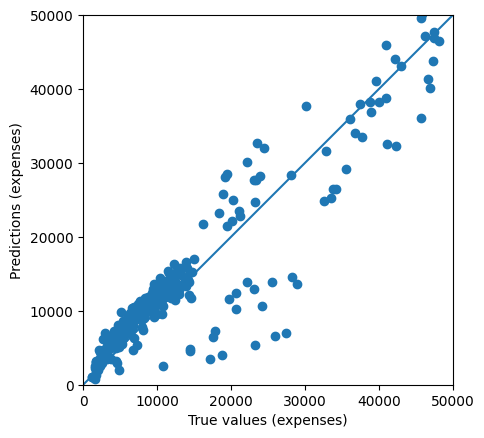

In [9]:

# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.


print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

 
test_predictions = model.predict(test_dataset_poly).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
